In [37]:
import pandas as pd
from time import perf_counter as time
from IPython.display import Image
profiles = pd.read_pickle("data/profiles.pkl")

In [38]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Identificando o perfil de consumo dos otakus

<font size="5">Análise da audiência dos animes usando um recorte de dados cedidos pela [myanimelist.net](myanimelist.net)</font>

## Disclaimer

A os dados presentes nesta análise potencialmente não representa bem todo o público que consome anime.

### 1) **57% dos perfis** não estão sendo usados por não oferecer informações suficientes para obter sua idade ou não apresentar nenhuma informação sobre seu consumo de animes

### 2) **25 a cada 27 dos perfis desconsiderados** não passou no critério de idade fornecida

### 3) **Mais de 99% dos perfis recuperados** possuem idade igual ou superior à 18 anos

O que pode nos levar à uma pergunta...

## Não existe nenhum adolescente assistindo anime?

Pessoalmente, eu considero bem improvável que os adolescentes não consumam anime. Mas precisamos lembrar que estamos usando dados de *pessoas cadastradas*, e isto pode implicar em:

Usuários com menos de 18 anos com receio de ser "*age locked*" por revelar sua idade real podem:
1. Não informar sua idade
2. Informar uma idade incorreta acima de 18 anos

Mesmo que seja plausível que mais da metade dos perfis sejam de adolescentes, fazer uma remoção desta proporção de dados não é tão prejudicial quando fazer uma inferência deliberada.

### Por isto nossa análise deve se limitar ao *comportamento de adultos consumindo anime*

## Overview dos perfis

Ainda conseguimos recuperar uma amostra de mais de **20 mil perfis de usuários cadastrados!**
Algumas das principais características deste público são:

### **66,5%** são homens

In [138]:
# porcentagem de homens
profiles_amount = profiles.shape[0]
males_amount = (profiles["gender"] == "Male").sum()
females_amount = (profiles["gender"] == "Female").sum()
print(
    "Males percent: {:.1f}%".format(males_amount/profiles_amount *100),
    "Females percent: {:.1f}%".format(females_amount/profiles_amount *100),
    sep="\n"
)

Males percent: 66.5%
Females percent: 27.0%


### A idade média é **29 anos**

In [40]:
#idade media
average_age = print("{:.1f}".format(profiles["user_age"].mean()))

29.2


### O gênero mais assistido é ***Shounen***

In [41]:
# Genero mais prevalente
anime_genres = [
    "Comedy", "Sports", "Drama", "School", "Shounen", "Music",
    "Romance", "Sci-Fi", "Adventure", "Mystery", "Fantasy", "Action",
    "Military", "Magic", "Supernatural", "Vampire", "Slice of Life",
    "Demons", "Historical", "Super Power", "Mecha", "Parody", "Samurai",
    "Seinen", "Police", "Psychological", "Josei", "Space", "Kids",
    "Shoujo Ai", "Ecchi", "Shoujo", "Horror", "Shounen Ai", "Cars",
    "Martial Arts", "Game", "Thriller", "Dementia", "Harem", "Hentai",
    "Yaoi", "Yuri"]

anime_audience = ["Shounen", "Seinen", "Shoujo", "Josei"]

profiles[anime_audience].sum().idxmax()

'Shounen'

### O subgênero mais prevalente é **Comédia**

In [42]:
subgenres_mask = [x not in anime_audience for x in anime_genres]
anime_subgenres = pd.Series(anime_genres)[subgenres_mask].tolist()

profiles[anime_subgenres].sum().idxmax()

'Comedy'

## Público-alvo

Alguns gêneros de anime indicam o tipo de audiência para qual o anime é direcionado:

- **Shounen** para o público adolescente e masculino;

- **Shoujo** para o público adolescente e feminino;

- **Seinen** para o homens com 18 anos ou mais;

- **Josei** para o mulheres com 18 anos ou mais;

In [43]:
# configrando dataset
target_genres = ["Shounen", "Shoujo", "Seinen", "Josei"]

temp = profiles[target_genres].sum().reset_index()
temp.columns = ("Gênero", "Audiência")
temp["Audiência"] = temp["Audiência"]\
    .apply(lambda x: x/temp["Audiência"].sum() *100)
temp.sort_values(by="Audiência", inplace=True, ascending=False)

In [44]:
# configurando plot
fig = px.bar(temp, "Audiência", "Gênero", template="plotly_white")
fig.update_xaxes(
    tickvals=temp["Audiência"], 
    ticktext=["{:.2f}%".format(x) for x in temp["Audiência"]]
)
fig.update_layout(height=300, width=900, margin={"t":0, "b":0, "l":0, "r":0})
fig.show(config={"displayModeBar": False})

## A audiência está compatível com o público alvo?

In [45]:
def check_target_audience(gender: str) -> list:
    
    # Considerando publico nao-binario adequado para qualquer audiência
    if gender in ["Female", "Male"]:
        if (gender == "Male"):
            targeted_to = ["Shounen", "Seinen"]
        else:
            targeted_to = ["Shoujo", "Josei"]

    else:
        targeted_to = ["Shounen", "Shoujo", "Seinen", "Josei"]
    
    return targeted_to

def is_target_to_genre(target: list, genre="Shounen") -> bool:
    return genre in target

# def audience_by_target(target: list, Shounen: int, Seinen: int, Shoujo: int, Josei: int, return_on_target=True):
    
#     if return_on_target:
#         out = 0
#         for i in target:
#             match i:
#                 case "Shounen": 
#                     out = out + Shounen
#                 case "Seinen": 
#                     out = out + Seinen
#                 case "Shoujo": 
#                     out = out + Shoujo
#                 case "Josei": 
#                     out = out + Josei 
#                 case _: 
#                     continue
#     else:
#         out = Shounen + Seinen + Shoujo + Josei
#         for i in target:
#             match i:
#                 case "Shounen": 
#                     out = out - Shounen
#                 case "Seinen": 
#                     out = out - Seinen
#                 case "Shoujo": 
#                     out = out - Shoujo
#                 case "Josei": 
#                     out = out - Josei
#                 case _: 
#                     continue
    
#     return out

In [46]:
# lista de generos para qual cada usuario esté elegivel
profiles["targeted"] = profiles.apply(
    lambda x: check_target_audience(x.gender), axis=1
)
# # quantidade de titulos vistos direcionados ao usuario
# profiles["on_target"] = profiles.apply(
#     lambda x: audience_by_target(
#         x.targeted, x.Shounen, x.Seinen,
#         x.Shoujo, x.Josei, return_on_target=True
#     ), axis=1
# )
# # quantidade de titulos vistos nao direcionados ao usuario
# profiles["off_target"] = profiles.apply(
#     lambda x: audience_by_target(
#         x.targeted, x.Shounen, x.Seinen,
#         x.Shoujo, x.Josei, return_on_target=False
#     ), axis=1
# )

profiles["shounen_target"] = profiles["targeted"].apply(lambda x: is_target_to_genre(x, genre="Shounen"))
profiles["seinen_target"] = profiles["targeted"].apply(lambda x: is_target_to_genre(x, genre="Seinen"))
profiles["shoujo_target"] = profiles["targeted"].apply(lambda x: is_target_to_genre(x, genre="Shoujo"))
profiles["josei_target"] = profiles["targeted"].apply(lambda x: is_target_to_genre(x, genre="Josei"))

profiles["male_target"] = profiles["shounen_target"] & profiles["seinen_target"]
profiles["female_target"] = profiles["shoujo_target"] & profiles["josei_target"]
profiles["nonbinary_target"] = profiles["male_target"] & profiles["female_target"]

In [136]:
# configurando dados

# agregando informações de público alvo
targeted_audience = ["male_target", "female_target", "nonbinary_target"]
temp = temp = profiles\
    .groupby(by=targeted_audience)[target_genres]\
    .sum()\
    .reset_index()

# tabela no formato long
temp = pd.melt(temp, id_vars=targeted_audience, var_name="Gênero", value_name="Audiência")

# mapeando público-alvo aos respectivos gêneros em uma coluna
def is_target(genre: str, m: bool, f: bool, nb: bool) -> bool:
    match genre:
        case "Shounen" | "Seinen": return m|nb
        case _: return f|nb
# adicionando nova informacao
args = zip(temp.Gênero, temp.male_target, temp.female_target, temp.nonbinary_target)
temp["Público-alvo*"] = pd.Series([is_target(*x) for x in args])\
    .map({True: "É público-alvo", False: "Não é público-alvo"})

# agregando generos em relacao ao sexo
temp["Gênero"] = temp["Gênero"].map({
    "Shounen": "Para homens", 
    "Seinen": "Para homens",
    "Shoujo": "Para mulheres",
    "Josei": "Para mulheres"})

# removendo colunas que nao serao usadas
temp.drop(targeted_audience, axis="columns", inplace=True)

# agregando linhas redundantes
temp = temp.groupby(["Gênero", "Público-alvo*"]).sum()

comp = []
for subset in ["Para homens", "Para mulheres"]:
    comp.append( temp.loc[subset].apply(lambda x: x/x.sum() *100) )

temp = pd.concat(comp)\
    .set_index(temp.index)\
    .reset_index()

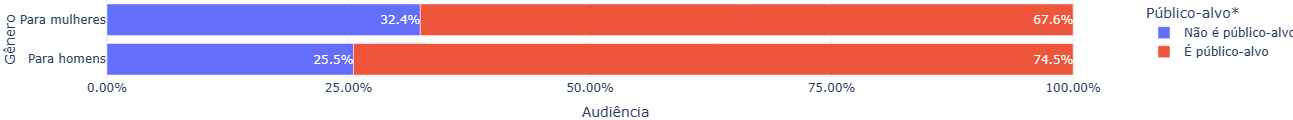

In [139]:
# configurando plot

fig = px.bar(
    temp, "Audiência", "Gênero", template="plotly_white", color="Público-alvo*",
    text=[f"{round(x, 1)}%" for x in temp["Audiência"]]
)

ticks = [x for x in range(0, 101, 25)]
fig.update_xaxes(
    tickvals=ticks, 
    ticktext=["{:.2f}%".format(x) for x in ticks]
)
fig.update_layout(
    height=120, width=900, margin={"t":0, "b":0, "l":0, "r":0}
)
fig.update_traces(textposition='inside', textfont_color="white")
fig.show(config={"displayModeBar": False})

<font size="1">*Considerando não-binários adequados para qualquer audiência</font>

Quanto maior a diferença entre a proporção da base cadastrada e a audiência, mais efeitiva podemos dizer que é a segregação de público-alvo. Com uma divisão de 66,5% de homens, 27% de mulhes e 6,5% não binários, obtemos:

- __+ 1,5%__ pontos percentuais nos títulos destinados aos homens
- __+ 33,5%__ nos títulos destinados às mulheres

> Parece que as mulheres não têm tanto problema quanto os homens em ver títulos destinados ao sexo oposto.

## Quem assiste *Shounen*?

Como vimos antes, est 

In [ ]:
targeted_audience = ["shounen_target", "seinen_target", "shoujo_target", "josei_target"]
temp = profiles\
    .groupby(by=targeted_audience)[target_genres]\
    .sum()\
    .reset_index()

def audience_description(shounen: bool, seinen: bool, shoujo: bool, josei: bool) -> str:
    if josei and not seinen:
        return "Mulher adulta"
    elif seinen and not josei:
        return "Homem adulto"
    else:
        return "Outros"

args = zip(temp.shounen_target, temp.seinen_target, temp.shoujo_target, temp.josei_target)
temp["Descrição"] = pd.Series([audience_description(*x) for x in args])

# removendo colunas que nao serao usadas
temp.drop(targeted_audience, axis="columns", inplace=True)

# tabela no formato long agregando valores redundantes
temp = pd.melt(temp, id_vars="Descrição", var_name="Gênero", value_name="Audiência")\
    .groupby(["Descrição", "Gênero"]).sum()\
    .reset_index()

# mantendo apenas valores para o genero 'shounen'
#temp = temp.loc[temp["Gênero"]=="Shounen"]

# valores em percentual e decrescentes
temp["Audiência*"] = temp["Audiência"]\
    .apply(lambda x: x/temp["Audiência"].sum() *100)
temp.sort_values(by="Audiência", inplace=True, ascending=False)

In [ ]:
fig = px.bar(
    temp, "Audiência*", "Descrição", template="plotly_white", color="Gênero", 
    text=[f"{round(x, 1)}%" for x in temp["Audiência*"]]
)

ticks = [x for x in range(0, 101, 25)]
fig.update_xaxes(
    tickvals=ticks, 
    ticktext=["{:.0f}%".format(x) for x in ticks]
)
fig.update_layout(height=300, width=900, margin={"t":0, "b":0, "l":0, "r":0})
fig.update_traces(textposition='inside', textfont_color="white")
fig.show(config={"displayModeBar": False})

<font size="1">*Relativa ao total que inclui apenas o gênero _Shounen_</font>

Vimos antes que **66,5% dos usuários cadastrados são do sexo masculino**, e estamos vendo **a mesma proporção** aqui entre os consumidores dos animes *Shounen*. Isto é um bom indício de que:

> ***Não existe distinção entre as preferências de homens e mulheres em relação à este gênero.***

## E se ignoramos idade?